<a href="https://colab.research.google.com/github/adibhosn/Machine_learning_lab/blob/main/Classification_Neural_network_numpy_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Erro: 0.49942987220474977
Epoch 1000, Erro: 0.49228743022913357
Epoch 2000, Erro: 0.4400001823006517
Epoch 3000, Erro: 0.31740906799529767
Epoch 4000, Erro: 0.16438038039517908
Epoch 5000, Erro: 0.10782491958036086
Epoch 6000, Erro: 0.08302598321274747
Epoch 7000, Erro: 0.06905576878882067
Epoch 8000, Erro: 0.05997829978011787
Epoch 9000, Erro: 0.05353791229501497


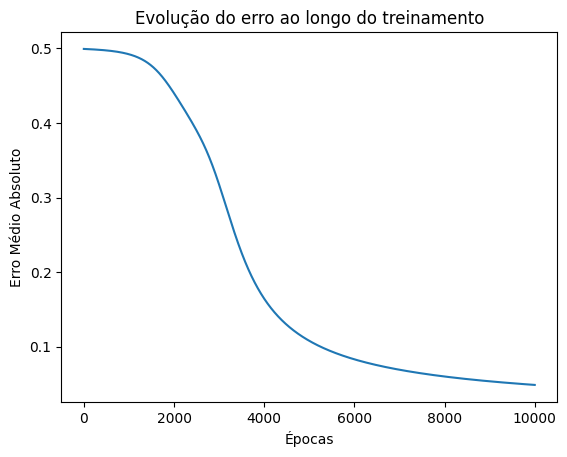

Saída final após o treinamento:
[[0.04410383]
 [0.95939785]
 [0.94556074]
 [0.05563674]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Função de ativação Sigmoid e sua derivada
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Criando dados de entrada (XOR problem)
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_expect = np.array([[0], [1], [1], [0]])  # Saída esperada

# Inicialização dos pesos e bias com valores aleatórios
np.random.seed(1)
input_size = 2
hidden_size = 4  # Camada oculta com 4 neurônios
output_size = 1

# Pesos e bias
weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
bias_hidden = np.random.uniform(-1, 1, (1, hidden_size))
bias_output = np.random.uniform(-1, 1, (1, output_size))

# Hiperparâmetros
epochs = 10000
learning_rate = 0.1
erros = []

# Treinamento
for epoch in range(epochs):
    # Feedforward
              #calculando a soma E
    hidden_layer_input = np.dot(x_data, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    final_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    # Cálculo do erro
    error = y_expect - final_output
    erros.append(np.mean(np.abs(error)))

    # Backpropagation(gradient)
    d_output = error * sigmoid_derivative(final_output)
    d_hidden_layer = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    # Atualização dos pesos e bias
    #transposta da matriz, para calcular cada peso corretamente
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    weights_input_hidden += x_data.T.dot(d_hidden_layer) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Exibir erro a cada 1000 épocas
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Erro: {np.mean(np.abs(error))}')

# Gráfico do erro
plt.plot(erros)
plt.xlabel('Épocas')
plt.ylabel('Erro Médio Absoluto')
plt.title('Evolução do erro ao longo do treinamento')
plt.show()

# Testando a rede treinada
print('Saída final após o treinamento:')
print(final_output)
